In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


In [34]:
df = pd.read_csv('4done.csv')

In [4]:
X=df["Mystery_Data_X"]
Y=df["Mystery_Data_Y"]

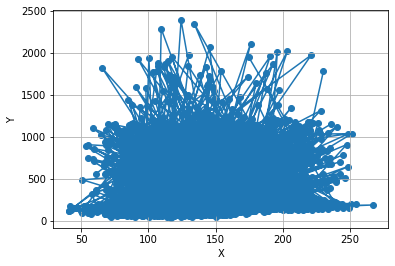

In [5]:
plt.plot(X,Y)
plt.scatter(X,Y)
plt.grid()
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

In [6]:
df['Mystery_Data_Y'] = df['Mystery_Data_Y'].fillna(0)

In [7]:
def outliers_detection(model, name):
    clf = model
    clf.fit(Y)
    
    outliers = clf.predict(Y)
    
    Y_outliers = Y[np.where(outliers==1)]
    X_outliers = X[np.where(outliers==1)]
    
    Y_inliers = Y[np.where(outliers==0)]
    X_inliers = X[np.where(outliers==0)]

    print(X_outliers)
    print(Y_outliers)

    df[name] = False
    for i in Y_outliers:
      index = list(Y).index(i)
      df[name][index]= True
    
    
    plt.scatter(X_outliers, Y_outliers, edgecolor='black',color='red', label='outliers')
    plt.scatter(X_inliers, Y_inliers, edgecolor='black',color='green', label='inliers')
    plt.title(name)
    plt.legend()
    plt.grid()
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.show()
    

In [8]:
! pip install pyod

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 134 kB 30.7 MB/s 
  Created wheel for pyod: filename=pyod-1.0.4-py3-none-any.whl size=165073 sha256=ec074e761c6b5849a6add177523f9ebaaf9b93ece13458250544837f5c691662
  Stored in directory: /root/.cache/pip/wheels/3d/48/a8/87d61660791c7e6b0f5c3068da7fb17ade7fdc041e864fe053
Successfully built pyod


In [9]:
Y=Y.values.reshape(-1,1)

In [10]:
X=X.values

# COPOD (Copula-Based Outlier Detection)

[206.6829218  194.0504225   96.73239392 ... 140.9941647  197.636441
 127.7027249 ]
[[  0.        ]
 [518.9311255 ]
 [ 72.05269604]
 ...
 [223.6075527 ]
 [858.6932819 ]
 [ 90.81531562]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


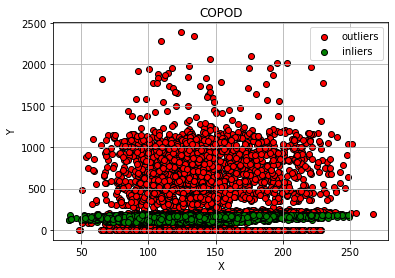

In [11]:
from pyod.models.copod import COPOD
model = COPOD(contamination=0.4)
anomaly_score = outliers_detection(model, 'COPOD')

In [12]:
df.to_csv("1done.csv")

# SOS (Stochastic Outlier Selection)

In [ ]:
from pyod.models.sos import SOS
model = SOS(contamination=0.4)
anomaly_score = outliers_detection(model, 'SOS')

# MAD (Median Absolute Deviation)

[194.0504225   86.45119072 148.2597397  ... 172.8230012  132.7172281
 197.636441  ]
[[ 518.9311255]
 [ 391.5233243]
 [ 917.5548741]
 ...
 [ 844.4575511]
 [1037.309767 ]
 [ 858.6932819]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


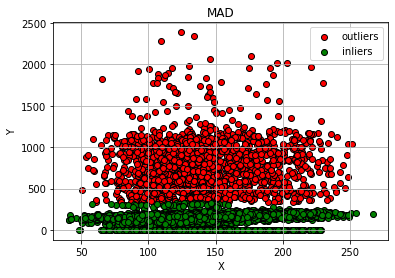

In [14]:
from pyod.models.mad import MAD
model = MAD()
anomaly_score = outliers_detection(model, 'MAD')

In [15]:
df.to_csv("8done.csv")

# Connectivity-Based Outlier Factor (COF)

In [ ]:
from pyod.models.cof import COF
model = COF(contamination=0.4)
anomaly_score = outliers_detection(model, 'COF')

# Anomaly Detection with Generative Adversarial Networks (AnoGAN)

In [ ]:
from pyod.models.anogan import AnoGAN
model = AnoGAN(contamination=0.4)
anomaly_score = outliers_detection(model, 'AnoGAN')

In [ ]:
df.to_csv("10done.csv")

# Deep One-Class Classification for outlier detection

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_1 (Dense)             (None, 64)                64        
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_1 (TFOpLam  (None, 32)               0         
 bda)                                                            
                                                                 
 tf.math.pow_1 (TFOpLambda)  (None, 32)                0         
                                                                 
 tf.math.reduce_sum_1 (TFOpL  (None,)                  0         
 ambda)                                                    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


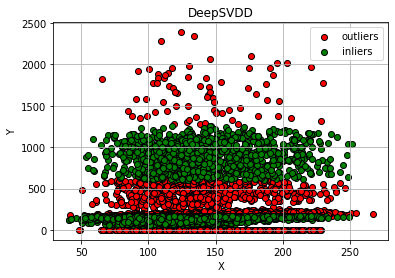

In [17]:
from pyod.models.deep_svdd import DeepSVDD
model = DeepSVDD(contamination=0.4)
anomaly_score = outliers_detection(model, 'DeepSVDD')

In [18]:
df.to_csv("7done.csv")

# Unsupervised Outlier Detection Using Empirical Cumulative Distribution Functions (ECOD)

[206.6829218  194.0504225   96.73239392 ... 140.9941647  197.636441
 127.7027249 ]
[[  0.        ]
 [518.9311255 ]
 [ 72.05269604]
 ...
 [223.6075527 ]
 [858.6932819 ]
 [ 90.81531562]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


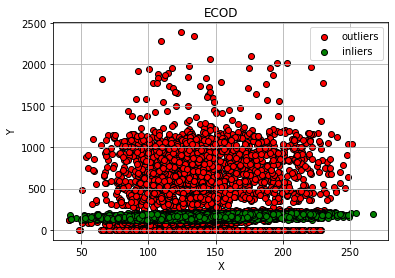

In [20]:
from pyod.models.ecod import ECOD
model = ECOD(contamination=0.4)
anomaly_score = outliers_detection(model, 'ECOD')

In [21]:
df.to_csv("6done.csv")

# Outlier detection based on Gaussian Mixture Model (GMM)

[206.6829218  194.0504225   96.73239392 ... 138.5523993  197.636441
 127.7027249 ]
[[  0.        ]
 [518.9311255 ]
 [ 72.05269604]
 ...
 [  0.        ]
 [858.6932819 ]
 [ 90.81531562]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


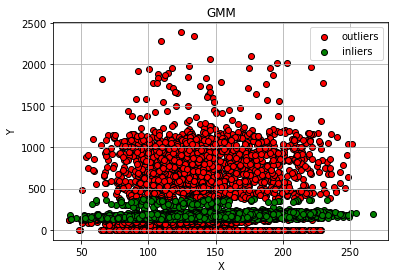

In [23]:
from pyod.models.gmm import GMM
model = GMM(contamination=0.4)
anomaly_score = outliers_detection(model, 'GMM')

In [24]:
df.to_csv("2done.csv")

# Histogram-based Outlier Detection (HBOS)

[194.0504225   86.45119072 148.2597397  ... 172.8230012  132.7172281
 197.636441  ]
[[ 518.9311255]
 [ 391.5233243]
 [ 917.5548741]
 ...
 [ 844.4575511]
 [1037.309767 ]
 [ 858.6932819]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


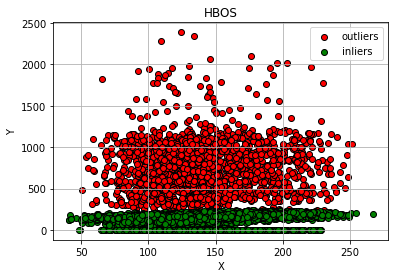

In [26]:
from pyod.models.hbos import HBOS
model = HBOS(contamination=0.4)
anomaly_score = outliers_detection(model, 'HBOS')

In [27]:
df.to_csv("3done.csv")

# LUNAR: Unifying Local Outlier Detection Methods via Graph Neural Networks

[194.0504225   86.45119072 130.3615546  104.3884963  147.0808179
 137.977435   130.1719636  101.4763602  104.6983863  154.661105
 179.9700648  120.7161986  139.1193698  156.5453664   85.62490877
 132.4717091  123.535102   118.3609002  181.2416831  108.2021937
 138.8286908  191.7679516  175.9685154  155.0651567  110.1963221
 190.5213071  104.9218157  124.8795825  116.9921581  139.3242704
 185.0147483  103.7557703   91.91599869 143.3558279  199.8794928
 178.5803537  220.79221     74.02424925 198.0702605  101.3508363
 173.5705899  141.3455269   79.16037896 101.7658909  217.6600551
 101.7553956  150.5493564  233.4678605  153.874445   169.9986363
 182.6450133  169.3806349   96.89149748  85.66760363 157.1727542
 108.1772669  137.8019181  215.7393848  189.9813959  136.1666597
 141.6773446  139.1075863  143.7783092  169.3143472  226.325098
 214.8796163  103.9330437  137.4347453  162.7179697  216.2061037
 121.099874   153.181137   102.0939319  112.8481262  176.0114666
 113.9837606  204.7011371 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


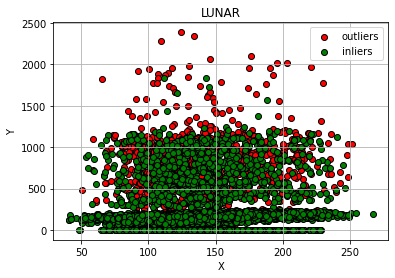

In [29]:
from pyod.models.lunar import LUNAR
model = LUNAR()
anomaly_score = outliers_detection(model, 'LUNAR')

In [30]:
df.to_csv("9done.csv")

# Principal Component Analysis (PCA) Outlier Detector

[129.2120702 107.2225766 206.6829218 ... 138.5523993 127.7027249
 109.4668833]
[[142.9294802 ]
 [131.4935575 ]
 [  0.        ]
 ...
 [  0.        ]
 [ 90.81531562]
 [132.6701086 ]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


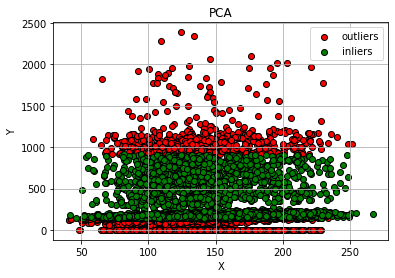

In [32]:
from pyod.models.pca import PCA
model = PCA(contamination=0.4)
anomaly_score = outliers_detection(model, 'PCA')

In [33]:
df.to_csv("4done.csv")

# Rotation-based Outlier Detector (ROD)

[115.7470578 129.2120702 107.2225766 ... 138.5523993 127.7027249
 109.4668833]
[[146.258981  ]
 [142.9294802 ]
 [131.4935575 ]
 ...
 [  0.        ]
 [ 90.81531562]
 [132.6701086 ]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


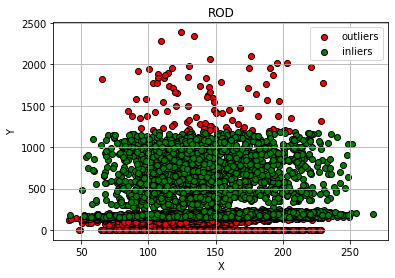

In [35]:
from pyod.models.rod import ROD
model = ROD(contamination=0.4)
anomaly_score = outliers_detection(model, 'ROD')

In [36]:
df.to_csv("5done.csv")